# Data from an online source
Data can be easily downloaded from online sources as
* USGS: HOST = 'earthquake.usgs.gov'

Here we use functionalities provided by the ``pycsep`` package which 
facilitates the data access.
Related functions require a 
*datetime.datetime*
to specify the start and end dates.
``pycsep`` provides access to the 
ComCat web API and to the 
Bollettino Sismico Italiano API using
* csep.query_comcat()
* csep.query_bsi().

## Define domain
You have to specify following aspects of the domain:

* time domain
    * time borders for the training T_borders_training
    * time borders for the testing T_borders_testing
    * time origin (when was '0.' days) given by a *datetime* format: '%Y-%m-%d %H:%M:%S.%f'
* spatial domain X_borders
* domain of the marks (magnitudes) usually by m0

In [1]:
import gpetas
import numpy as np
import csep
from csep.utils import time_utils, comcat
#from csep.utils import comcat
import datetime




# auto reload using developer version
%load_ext autoreload
%autoreload 2


In [2]:
# specify domain
T_borders_all = np.array([0.,4383.]) # until '2022-01-01 00:00:00.0'
T_borders_training = np.array([0.,3000.])
time_origin = '2010-01-01 00:00:00.0'
X_borders = np.array([[-120., -113.],[  30.,   37.]])
m0=3.

domain_obj = gpetas.utils.R00x_setup.region_class()
domain_obj.T_borders_all = T_borders_all
domain_obj.T_borders_training=T_borders_training
domain_obj.T_borders_testing = np.array([T_borders_training[1],T_borders_all[1]])
domain_obj.time_origin = time_origin
domain_obj.X_borders = X_borders
domain_obj.m0 = m0
vars(domain_obj)


{'T_borders_all': array([   0., 4383.]),
 'T_borders_training': array([   0., 3000.]),
 'T_borders_testing': array([3000., 4383.]),
 'X_borders': array([[-120., -113.],
        [  30.,   37.]]),
 'X_borders_UTM_km': None,
 'X_borders_original': None,
 'time_origin': '2010-01-01 00:00:00.0',
 'm0': 3.0}

In [3]:
# get pycsep catalog object
start_time = csep.utils.time_utils.strptime_to_utc_datetime(domain_obj.time_origin)
end_time = csep.utils.time_utils.strptime_to_utc_datetime('2022-01-01 00:00:00.0')
min_magnitude=domain_obj.m0
min_latitude=domain_obj.X_borders[1,0]
max_latitude=domain_obj.X_borders[1,1]
min_longitude=domain_obj.X_borders[0,0]
max_longitude=domain_obj.X_borders[0,1]
cat = csep.query_comcat(start_time=start_time, end_time=end_time, 
                        min_magnitude=min_magnitude, 
                        min_latitude=min_latitude,max_latitude=max_latitude, 
                        min_longitude=min_longitude, max_longitude=max_longitude)

Fetched ComCat catalog in 25.435472011566162 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2010-01-01 02:33:42.820000+00:00
End Date: 2021-12-31 19:27:58.900000+00:00
Min Latitude: 30.0063 and Max Latitude: 36.989
Min Longitude: -119.9998333 and Max Longitude: -113.0256
Min Magnitude: 3.0
Found 4814 events in the ComCat catalog.


In [4]:
# cat2data_obj
data_obj = gpetas.utils.get_data_pycsep.data_obj__from_catalog_obj(catalog_obj=cat,R_obj=domain_obj)

jitter= 3.472223397693597e-07
    Values at idx [2027] and [2028] (counting from 0 to n-1) are the same.
    Time: [968.88711481] [968.88711481]  days.
    NEW Times: [968.88711481] [968.88711516]  days.
NEW number of time duplicates= 0
----------------------------------------------------------------------
total number of events =  4814
time origin            =  2010-01-01 00:00:00+00:00
Starting time          = 0.0 time max= 4383.0
T_borders all          = [   0. 4383.]
|T|                    = 4383.0  days.
T_borders training     = [   0. 3000.]
min event time         = 0.10674560185185185
max event time         = 4382.81109837963
X_borders              = [[-120. -113.]
 [  30.   37.]]
|X|= 49.0 deg**2
x lon min -119.9998333 x lon max -113.0256 dx= 6.974233300000009
y lat min 30.0063 y lat max 36.989 dy= 6.982699999999998
minimum magnitude 3.0 maximum magnitude 7.2
Number of identical event times:   0
Fname is:  comcat_case01_m0_30.dat
________________________________________________

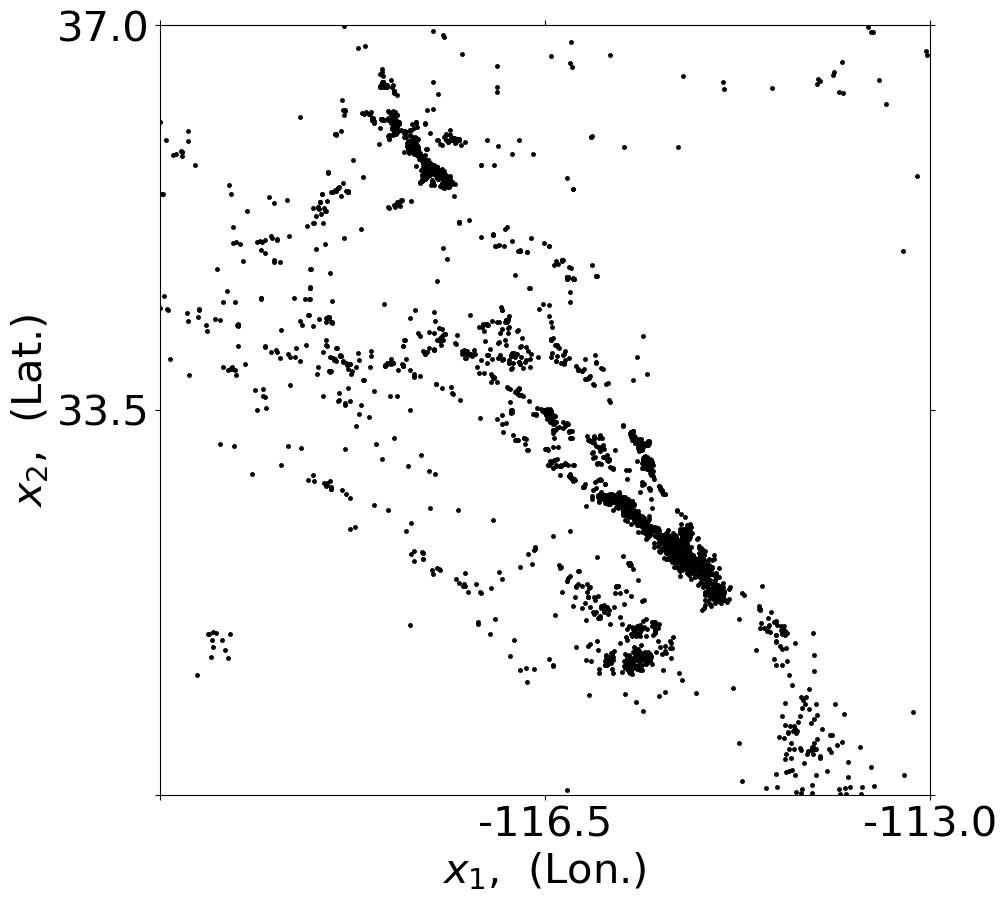

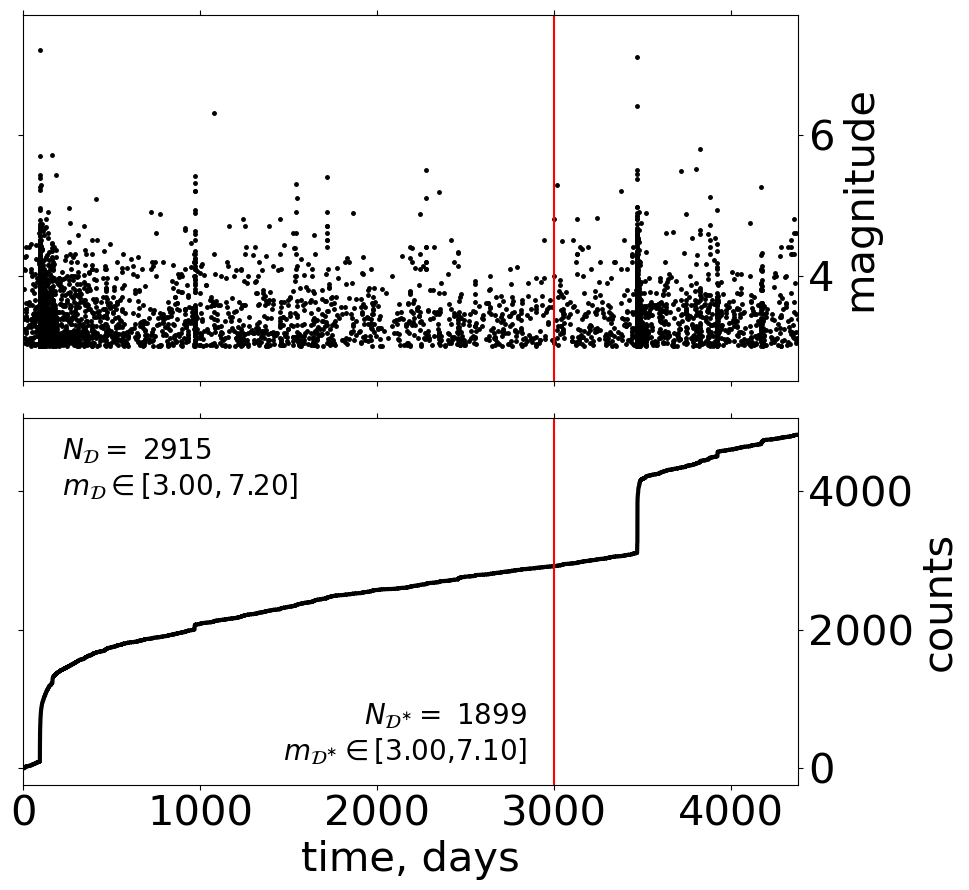

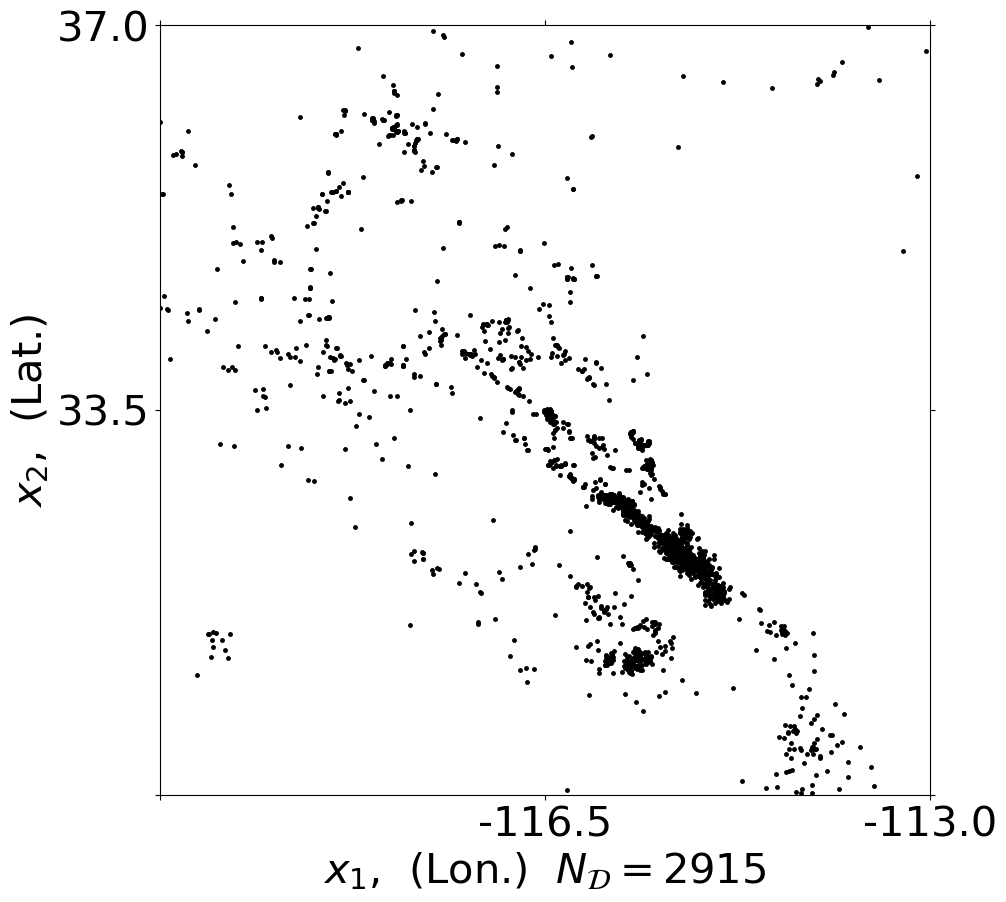

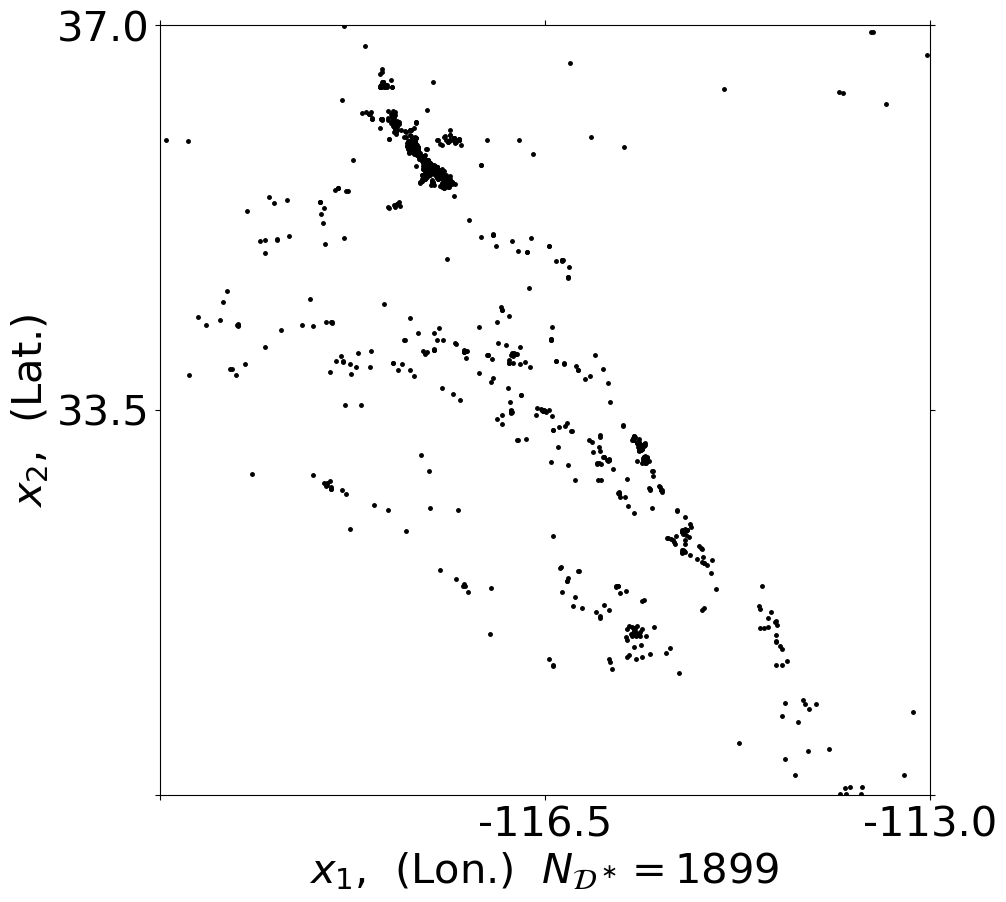

In [7]:
h=gpetas.plotting.plot_setting(data_obj=data_obj)